In [9]:
%reset -f
%matplotlib inline
import sys
sys.path.append('../')
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn.apionly as sns
import pylab as pl

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

## 1) Computing time comparison: BinaCox vs. Auto Cutoff methods

In [10]:
data = pd.read_json("./results_data/time1")
data.head()

,method,n,time
0,BinaCox,300,0.024455
1,BinaCox,300,0.024448
10,BinaCox,300,0.022883
100,BinaCox,4000,0.069444
101,BinaCox,4000,0.010270


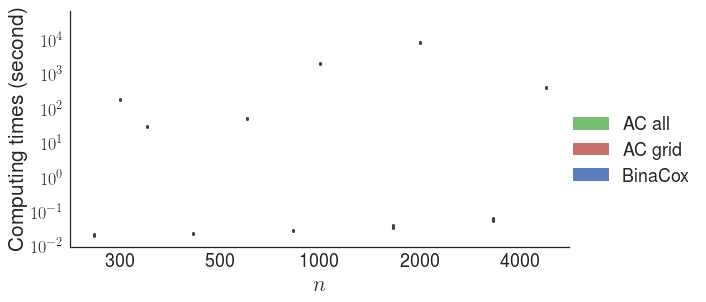

In [11]:
fig = pl.figure(figsize=(15, 7))
sns.set(style="white")
g = sns.factorplot(x="n", 
                   y="time", 
                   hue="method", 
                   data=data,
                   aspect=2,
                   kind="bar", 
                   palette="muted",
                   legend=False)
g.set_ylabels(r"Computing times (second)", fontsize=21)
g.set_xlabels(r"$n$", fontsize=22)
g.set_xticklabels(fontsize = 18)
g.set_yticklabels(fontsize = 18)
g.add_legend(fontsize = 18)
g.fig.get_axes()[0].set_yscale('log')
#pl.savefig('./figures/time1.pdf', bbox_inches='tight')
pl.show()

In [ ]:
pas mettre la 2nd figure juste la valeur moy (std) pr p=100 pr dire que même en high dim binacox reste hyper rapide

## 2) Computing times $=f(p)$ for BinaCox

In [7]:
data = pd.read_json("./results_data/time2")
data = data[data.columns.sort_values()]
data.head()

,2,3,4,5,6,8,10,12,15,19,23,29,35,43,53,66,81,100
0,0.053370,0.059713,0.066374,0.075205,0.080169,0.096569,0.112361,0.126472,0.152779,0.180277,0.212769,0.256213,0.313134,0.391411,0.567717,0.499447,0.542191,0.655864
1,0.053221,0.060525,0.068146,0.074926,0.083279,0.098381,0.114213,0.127246,0.152446,0.172780,0.213386,0.266047,0.320330,0.420471,0.423935,0.452489,0.915703,0.620520
10,0.049139,0.056712,0.063478,0.071880,0.077806,0.094074,0.108547,0.120886,0.147400,0.174744,0.212685,0.257087,0.313439,0.379939,0.413262,0.758790,0.823292,0.773103
11,0.049111,0.056612,0.063119,0.072321,0.077339,0.093224,0.104714,0.120790,0.143596,0.177773,0.205355,0.257042,0.314546,0.397389,0.479326,0.560397,0.543646,0.763140
12,0.049316,0.008816,0.062584,0.070661,0.078004,0.092451,0.108274,0.125743,0.147040,0.177638,0.208920,0.266151,0.310777,0.386604,0.654292,0.962539,0.655050,0.605315


In [5]:
data = data.ix[:,:10]

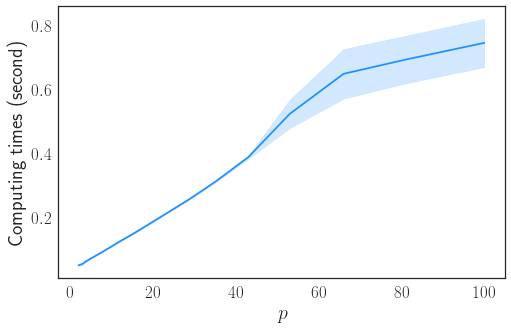

In [8]:
fig = pl.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
mean = data.mean()       
n_simu = data.shape[1]
eps = data.std() / np.sqrt(n_simu) * 1.96
pl.plot(data.columns, mean, color="dodgerblue")
pl.fill_between(data.columns, mean - eps, mean + eps, 
                color="dodgerblue", alpha=0.2)            
ax.tick_params(axis='both', which='major', direction='in', labelsize=17)
ax.set_xlabel('$p$', fontsize=20)
ax.set_ylabel('Computing times (second)', fontsize=20)
#pl.savefig('./figures/time2.pdf', bbox_inches='tight')
pl.show()